Nama : Muhammad Gymnastiar Mursyid<br>
NIM : 24.66.1011 <BR>
Prodi : Informatika(Student Exchange)<br>
Mata Kuliah : BDDM

In [1]:
!pip install tensorflow==2.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Step 1: Load and Preprocess Data
file_path = '/content/monroe county car crach 2003-2015.csv'
data = pd.read_csv(file_path, encoding='latin1')
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


# Prepocessing Data

In [4]:
# Cek missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64


In [5]:
# Hapus baris dengan missing values dan simpan hasilnya
data = data.dropna().reset_index(drop=True)

In [6]:
# Cek kembali apakah missing values sudah dihapus
print("Jumlah missing values pada dataset setelah pembersihan:")
print(data.isnull().sum())

Jumlah missing values pada dataset setelah pembersihan:
Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64


In [7]:
# Tampilkan jumlah data setelah pembersihan
print(f"Jumlah baris setelah pembersihan: {len(data)}")

Jumlah baris setelah pembersihan: 52582


In [8]:
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
52577,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
52578,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
52579,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
52580,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [9]:
# Gabungkan data berdasarkan bulan
data['Waktu'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
monthly_data = data.groupby(data['Waktu'].dt.to_period('M')).size().reset_index(name='Jumlah_Kecelakaan')
monthly_data['Waktu'] = monthly_data['Waktu'].dt.to_timestamp()

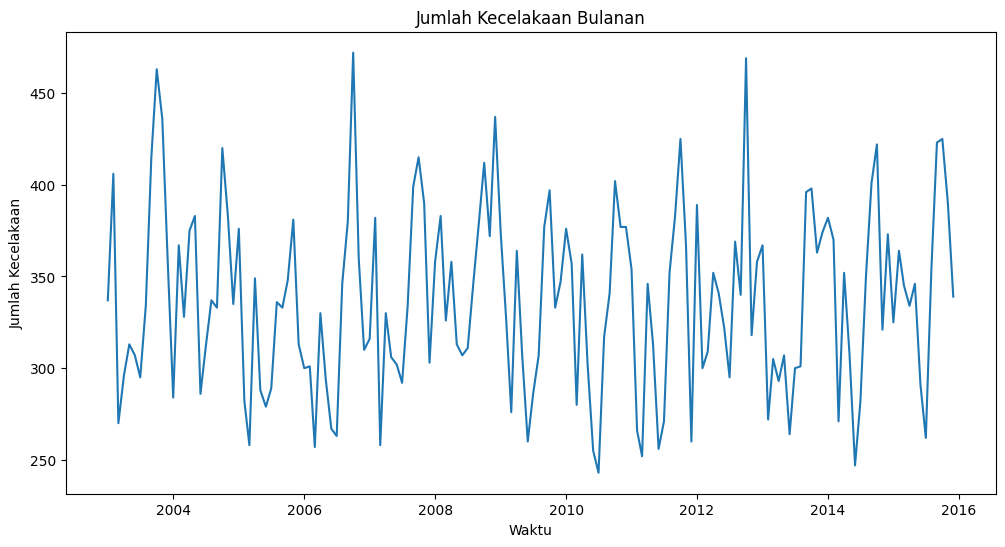

In [10]:
# Plot data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Waktu'], monthly_data['Jumlah_Kecelakaan'])
plt.title('Jumlah Kecelakaan Bulanan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

In [11]:
# Normalisasi data
scaler = MinMaxScaler()
monthly_data['Jumlah_Kecelakaan_Dinormalisasi'] = scaler.fit_transform(monthly_data[['Jumlah_Kecelakaan']])

In [12]:
# Tambahkan fitur bulan sebelumnya
monthly_data['Lag_1'] = monthly_data['Jumlah_Kecelakaan_Dinormalisasi'].shift(1)
monthly_data.dropna(inplace=True)

# Modeling LSTM

In [13]:
# Membuat data sekuensial untuk LSTM
sequence_length = 12
X, y = [], []
data_values = monthly_data['Jumlah_Kecelakaan_Dinormalisasi'].values
for i in range(len(data_values) - sequence_length):
    X.append(data_values[i:i + sequence_length])
    y.append(data_values[i + sequence_length])
X, y = np.array(X), np.array(y)

In [14]:
# Membagi data menjadi training dan testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [15]:
# Reshape untuk LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
#Bangun dan Latih Model LSTM
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#Latih model yang dioptimalkan
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.1795 - val_loss: 0.1925
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1348 - val_loss: 0.1211
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0836 - val_loss: 0.0480
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0501 - val_loss: 0.0462
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0421 - val_loss: 0.0518
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0469 - val_loss: 0.0499
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0447 - val_loss: 0.0497
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0471 - val_loss: 0.0472
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - val_loss: 0.0525
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0466 - val_loss: 0.0444
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0461 - val_loss: 0.0437
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0500 - val_loss: 0.0509

# Model Evaluasi

In [18]:
# Evaluasi Kinerja Model
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


In [19]:
# Metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)

In [20]:
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")

RMSE: 41.31784067771348
MAPE: 10.33%


In [21]:
#Memprediksi Nilai Masa Depan
future_months = 32  # Jumlah bulan ke depan yang ingin diprediksi
last_sequence = data_values[-sequence_length:].tolist()  # Ambil sekuens terakhir dari data
future_predictions = []

In [22]:
for _ in range(future_months):
    input_sequence = np.array(last_sequence[-sequence_length:]).reshape(1, sequence_length, 1)
    next_prediction = model.predict(input_sequence, verbose=0)[0, 0]
    future_predictions.append(next_prediction)
    last_sequence.append(next_prediction)

In [23]:
# Konversi prediksi ke skala aslinya
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [24]:
#Hasilkan Tanggal Mendatang dan Visualisasikan
last_date = monthly_data['Waktu'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=future_months, freq='MS')

In [25]:
# Buat DataFrame untuk hasil prediksi
future_data = pd.DataFrame({
    'Waktu': future_dates,
    'Prediksi_Jumlah_Kecelakaan': future_predictions_rescaled.flatten()
})

# VISUALISASI PREDIKSI

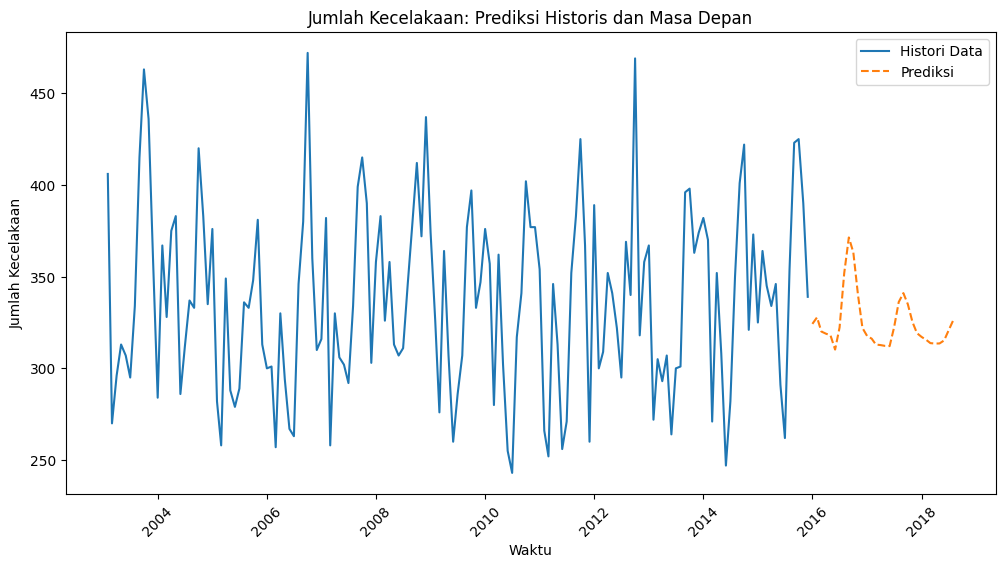

        Waktu  Prediksi_Jumlah_Kecelakaan
0  2016-01-01                  324.250061
1  2016-02-01                  327.805206
2  2016-03-01                  320.075439
3  2016-04-01                  318.894623
4  2016-05-01                  318.019531
5  2016-06-01                  310.239075
6  2016-07-01                  322.321930
7  2016-08-01                  351.883942
8  2016-09-01                  371.378296
9  2016-10-01                  363.228699
10 2016-11-01                  340.179352
11 2016-12-01                  322.040131
12 2017-01-01                  317.691010
13 2017-02-01                  316.184235
14 2017-03-01                  312.976349
15 2017-04-01                  312.694214
16 2017-05-01                  312.255035
17 2017-06-01                  312.131073
18 2017-07-01                  322.404724
19 2017-08-01                  336.150848
20 2017-09-01                  341.021545
21 2017-10-01                  334.944366
22 2017-11-01                  325

In [26]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Waktu'], monthly_data['Jumlah_Kecelakaan'], label='Histori Data')
plt.plot(future_data['Waktu'], future_data['Prediksi_Jumlah_Kecelakaan'], label='Prediksi', linestyle='--')
plt.title('Jumlah Kecelakaan: Prediksi Historis dan Masa Depan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Tampilkan hasil prediksi
print(future_data)

# Menyimpan Model

In [27]:
from tensorflow.keras.models import load_model

# Simpan model ke file
model_save_path = 'lstm_model_prediksi_kecelakaan.h5'
model.save(model_save_path)
print(f"Model telah disimpan ke {model_save_path}")

Model telah disimpan ke lstm_model_prediksi_kecelakaan.h5


In [30]:
import joblib

# Simpan scaler
scaler_save_path = 'scaler_prediksi_kecelakaan.pkl'
joblib.dump(scaler, scaler_save_path)
print(f"Scaler telah disimpan ke {scaler_save_path}")

Scaler telah disimpan ke scaler_prediksi_kecelakaan.pkl


In [31]:
# Memuat scaler
scaler = joblib.load(scaler_save_path)
print("Scaler berhasil dimuat.")

Scaler berhasil dimuat.
